In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Read Data Source

In [2]:
from pathlib import Path
data_dir = Path('/Users/sanamjankurban/Documents/Jupyter_projects/Data Analysis Examples/DataBases')

import os
os.listdir(data_dir)

['-disbtribution-worldwide-2020-03-22.csv',
 'dataset.xlsx',
 '-disbtribution-worldwide-2020-03-20.csv',
 '-Investment-Tracker-2019-Fall-FINAL.csv',
 '.DS_Store',
 'nesarc_pds.csv',
 '-disbtribution-worldwide-2020-03-31.csv',
 'TÜRKİYE son veriler.xlsx',
 'addhealth_pds.csv',
 'FuelConsumptionCo2.csv',
 'COVID-19-geographic-disbtribution-worldwide-2020-03-31.xlsx',
 'tree_addhealth.csv',
 'China-Global-Investment-Tracker-2019-Fall-FINAL.xlsx',
 'marscrater_pds.csv',
 'covid19-global-forecasting-week-1.zip',
 'csvfile.csv',
 'covid19-global-forecasting-week-1',
 'ool_pds.csv',
 'china_gdp.csv',
 'dataset.csv',
 'gapminder.csv']

In [3]:
df = pd.read_csv(data_dir/"FuelConsumptionCo2.csv")

# look at database
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
mdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
mdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


plot Emission values with respect Engine size

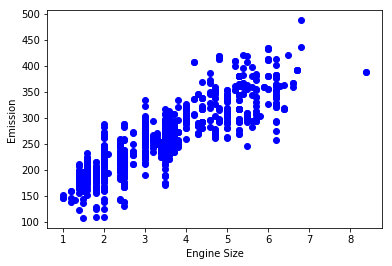

In [5]:
plt.scatter(mdf.ENGINESIZE, mdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

### Create training and testing dataset

In [6]:
# split dataset into train dataset and test dataset with np.random.rand()
msk = np.random.rand(len(df))<0.8
train = mdf[msk]
test = mdf[~msk]

### train data distribution

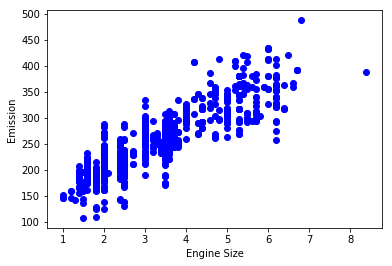

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

## Multiple Regression Model

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)

Coefficients:  [[9.86355184 8.0870763  9.54919849]]


### OLS ordinary least squares

Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

## Prediction

In [9]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat-y)**2))

# Explaind variance score: 1 is perfect prediction
print("Variance score: %.2f" % regr.score(x, y))

Residual sum of squares: 536.28
Variance score: 0.87


## Practical 

### build a model

In [10]:
from sklearn import linear_model
regr = linear_model.LogisticRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print('Coefficints: ', regr.coef_)

Coefficints:  [[-0.72588697  0.30875156 -0.29671297]
 [-0.7141618   0.26330001 -0.26580881]
 [-1.08267276  0.79256882 -0.24767217]
 [-0.76314264  0.38368215 -0.2838539 ]
 [-0.81282017  0.40599028 -0.24720984]
 [-0.64195569  0.22442597 -0.26408235]
 [-1.36183486  1.1150428  -0.17487978]
 [-0.61503696  0.26294882 -0.2494272 ]
 [-0.6687558   0.32709848 -0.24009235]
 [-0.49436592  0.03526305 -0.15365026]
 [-0.16029911 -0.37798694 -0.26104369]
 [-0.25526155 -0.22212719 -0.27809601]
 [-0.29200917 -0.0392006  -0.27200203]
 [-0.04191188 -0.37396558 -0.27050929]
 [-0.04751926 -0.43702536 -0.24209991]
 [-0.14101033 -0.40894717 -0.17768104]
 [-0.06010326 -0.41104061 -0.14681785]
 [-0.08359968 -0.35154192 -0.23619598]
 [-0.01266323 -0.53076256 -0.16695835]
 [-0.2788156  -0.11110114 -0.14742405]
 [-0.36437046 -0.01916124 -0.23000881]
 [-0.4359221   0.1484806  -0.16600232]
 [-0.22126164 -0.18588545 -0.13940284]
 [-0.39965033 -0.05063379 -0.01952004]
 [-0.1505034  -0.42385761 -0.23138293]
 [-0.341316

/Users/sanamjankurban/anaconda3/envs/ProjectECO/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sanamjankurban/anaconda3/envs/ProjectECO/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sanamjankurban/anaconda3/envs/ProjectECO/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### prediction

In [11]:
y_hat = regr.predict(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat-y)**2))
print("Variance score: %.2f" % regr.score(x, y))

Residual sum of squares: 7726.01
Variance score: 0.05
